# Lesson 4: File Formats Exercise

First import packages and create directories:

In [1]:
import os

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import earthpy as et

In [2]:
home_dir = os.path.join(et.io.HOME, 'earth-analytics',
                       'data', 'earthpy-downloads')

# create path if doesnt exist
if not os.path.isdir(home_dir):
    os.makedirs(home_dir)
    
os.chdir(os.path.join(et.io.HOME,
                     'earth-analytics',
                     'data',
                     'earthpy-downloads'))

### Challenge 1: Open a Text File

In [3]:
# download data for the climbing formations in Boulder
et.data.get_data(url="https://opendata.arcgis.com/datasets/175425c25d8849b58feb89483ef02961_1.csv")

'/Users/giorgio/earth-analytics/data/earthpy-downloads/OSMP_Climbing_Formations.csv'

In [4]:
climbing_formation_path = os.path.join(et.io.HOME, 
                                       'earth-analytics',
                                       'data',
                                       'earthpy-downloads', 
                                       'OSMP_Climbing_Formations.csv')

clmb_form = pd.read_csv(climbing_formation_path)
clmb_form.head()

,X,Y,OBJECTID,ID,FEATURE,ROUTES,HCA,OWNER,SeasonalClosure,AreaAccess,UseRating,AKA,ClosureActive,PERMITREQ,FormationType,Display,FixedHardwarePermit
0,-105.294224,40.005020,1,1.0,Pumpkin Rock,4.0,No,OSMP,N,Flagstaff,2.50,First Areas,N,No,Boulder,Yes,NaN
1,-105.287861,39.975276,2,2.0,Veranda,2.0,No,OSMP,N,NCAR,0.00,NaN,N,No,Wall,Yes,NaN
2,-105.293598,39.995411,3,3.0,Third Pinnacle,7.0,No,OSMP,Y,Gregory Canyon,1.25,NaN,N,No,Wall,Yes,NaN
3,-105.294391,39.986358,4,4.0,The Fin,1.0,No,OSMP,Y,Chautauqua,1.17,NaN,N,No,Wall,Yes,NaN
4,-105.292811,39.995952,5,6.0,First Pinnacle,23.0,No,OSMP,Y,Gregory Canyon,2.20,NaN,N,No,Wall,Yes,NaN


### Convert x,y Coordinate Data To A GeoDataFrame (or shapefile) - Spatial Data in Tabular Formats

### Challenge 2: Create a Spatial GeoDataframe From a Dataframe

We can create a Geopandas `GeoDataFrame` from a Pandas `DataFrame` if there is coordinate data in the DataFrame.

In [5]:
coords = gpd.points_from_xy(clmb_form.X, clmb_form.Y)

In [7]:
clmb_form_gdf = gpd.GeoDataFrame(data=clmb_form, geometry=coords)
clmb_form_gdf.head()

,X,Y,OBJECTID,ID,FEATURE,ROUTES,HCA,OWNER,SeasonalClosure,AreaAccess,UseRating,AKA,ClosureActive,PERMITREQ,FormationType,Display,FixedHardwarePermit,geometry
0,-105.294224,40.005020,1,1.0,Pumpkin Rock,4.0,No,OSMP,N,Flagstaff,2.50,First Areas,N,No,Boulder,Yes,NaN,POINT (-105.29422 40.00502)
1,-105.287861,39.975276,2,2.0,Veranda,2.0,No,OSMP,N,NCAR,0.00,NaN,N,No,Wall,Yes,NaN,POINT (-105.28786 39.97528)
2,-105.293598,39.995411,3,3.0,Third Pinnacle,7.0,No,OSMP,Y,Gregory Canyon,1.25,NaN,N,No,Wall,Yes,NaN,POINT (-105.29360 39.99541)
3,-105.294391,39.986358,4,4.0,The Fin,1.0,No,OSMP,Y,Chautauqua,1.17,NaN,N,No,Wall,Yes,NaN,POINT (-105.29439 39.98636)
4,-105.292811,39.995952,5,6.0,First Pinnacle,23.0,No,OSMP,Y,Gregory Canyon,2.20,NaN,N,No,Wall,Yes,NaN,POINT (-105.29281 39.99595)


In [9]:
clmb_form_gdf.drop(columns=['X', 'Y'], inplace=True)
clmb_form_gdf.head()

,OBJECTID,ID,FEATURE,ROUTES,HCA,OWNER,SeasonalClosure,AreaAccess,UseRating,AKA,ClosureActive,PERMITREQ,FormationType,Display,FixedHardwarePermit,geometry
0,1,1.0,Pumpkin Rock,4.0,No,OSMP,N,Flagstaff,2.50,First Areas,N,No,Boulder,Yes,NaN,POINT (-105.29422 40.00502)
1,2,2.0,Veranda,2.0,No,OSMP,N,NCAR,0.00,NaN,N,No,Wall,Yes,NaN,POINT (-105.28786 39.97528)
2,3,3.0,Third Pinnacle,7.0,No,OSMP,Y,Gregory Canyon,1.25,NaN,N,No,Wall,Yes,NaN,POINT (-105.29360 39.99541)
3,4,4.0,The Fin,1.0,No,OSMP,Y,Chautauqua,1.17,NaN,N,No,Wall,Yes,NaN,POINT (-105.29439 39.98636)
4,5,6.0,First Pinnacle,23.0,No,OSMP,Y,Gregory Canyon,2.20,NaN,N,No,Wall,Yes,NaN,POINT (-105.29281 39.99595)


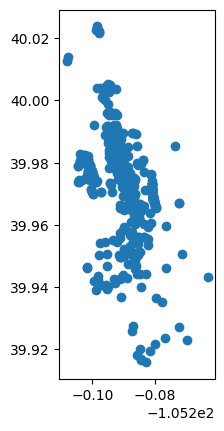

In [10]:
f, ax = 
clmb_form_gdf.plot()
plt.show()

### Challenge 3: Create a Base Map

In [11]:
et.data.get_data(url="https://opendata.arcgis.com/datasets/955e7a0f52474b60a9866950daf10acb_0.geojson")

'/Users/giorgio/earth-analytics/data/earthpy-downloads/City_of_Boulder_City_Limits.geojson'

This data is in the `geojson` format. It can be read into Geopandas in the same way we would read in shapefiles.

In [12]:
city_lims_path = climbing_formation_path = os.path.join(et.io.HOME, 
                                       'earth-analytics',
                                       'data',
                                       'earthpy-downloads', 
                                       'City_of_Boulder_City_Limits.geojson')

In [13]:
boulder_city_lims = gpd.read_file(city_lims_path)

boulder_city_lims.head()

,OBJECTID,TYPE,ShapeSTArea,ShapeSTLength,geometry
0,38,City,7.139496e+07,45963.359322,"POLYGON Z ((-105.19693 40.08378 0.00000, -105...."
1,39,City,4.071379e+07,64783.985916,"POLYGON Z ((-105.20219 40.06826 0.00000, -105...."
2,40,City,8.103168e+04,1661.732555,"POLYGON Z ((-105.21128 40.01726 0.00000, -105...."
3,41,City,2.092505e+07,34856.338250,"POLYGON Z ((-105.26349 40.08020 0.00000, -105...."
4,42,City,6.436393e+08,302183.109922,"POLYGON Z ((-105.29508 40.04174 0.00000, -105...."


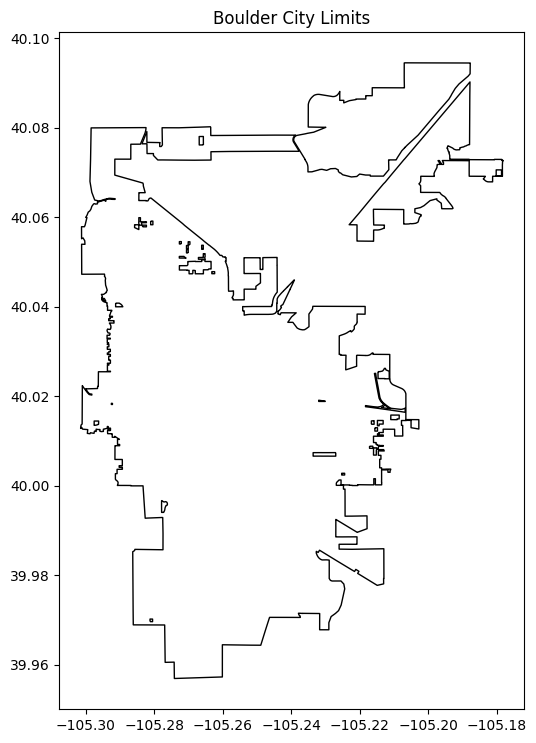

In [16]:
f, ax1 = plt.subplots(figsize=(6, 10))

boulder_city_lims.plot(ax=ax1, color='white', edgecolor='black')  # polygons

# Add a title
ax1.set(title="Boulder City Limits")
plt.show()

### Challenge 4: Plot Two GeoDataframes Together in the Same Figure

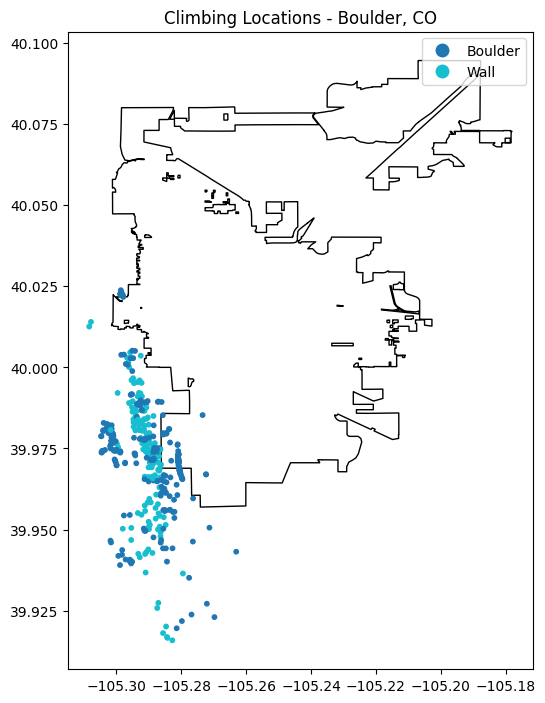

In [21]:
fig, ax1 = plt.subplots(figsize=(6,10))

boulder_city_lims.plot(ax=ax1, edgecolor='black', color='white')
clmb_form_gdf.plot(ax=ax1, legend=True, column='FormationType', markersize=10)
ax1.set(title='Climbing Locations - Boulder, CO')
plt.show()

### Challenge 5: Customize Your Map

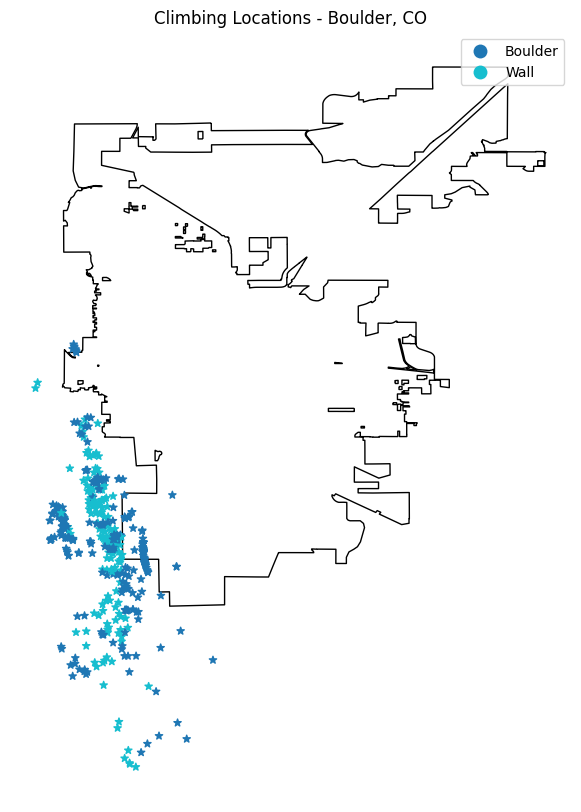

In [28]:
fig, ax1 = plt.subplots(figsize=(10,10))

boulder_city_lims.plot(ax=ax1, edgecolor='black', color='white')
clmb_form_gdf.plot(ax=ax1, legend=True, column='FormationType', marker='*', markersize=30)
ax1.set_title('Climbing Locations - Boulder, CO')
ax1.set_axis_off()
plt.show()

### Optional: Interactive Spatial Maps Using Folium

In [29]:
import folium

ModuleNotFoundError: No module named 'folium'